## 시계열(Time Series)분석
   * 1. 시계열 자료
    - 년도별 계절별 월별 일별 시 분 초별로 시간의 흐름에 따라 관측된 자료
   * 2. 시계열자료의 여러 형태
    - 시계열 그림(time series plot)
    - 시간의 경과에 따라 시계열 자료의 값이 변하는 것을 그린 그림
   * 3. 시계열자료의 분석 목적:
    - (forecast) 미래에 대한 예측
    - 시스템 또는 확률과정의 이해와 제어(control) ARIMA와 같은 확률론적이고 이론적인 모형이 아니라 몇가지 경험적 규칙(heuristic rule)을 
      사용하는 단순 회귀모형이지만 단기적 예측에서는 큰 문제 없이 사용할 수 있다.
   * 4. Prophet
    - Facebook 에서 발표한 시계열 데이터 기반의 예측 라이브러리. 파이썬과 R에서 사용할 수 있습니다. 통계적 지식이 없어도 파라미터를 
       통해 모형을 조정할 수 있고,일반적인 경우 기본값만 사용해도 높은 성능을 보여줌 내부가 어떻게 동작하는지 고민할 필요가 없음

# 1. Numpy의 profit으로 회귀(regression) 분석하기
 * 1) 야후 파이낸스 데이터를 가져오기 위한 yfinance
        * pip install yfinance
 *  2) 예측 모델링 및 시각화를 위한 prophet
        * pip install prophet
 *  3) Prophets는 Plotly 기반으로 데이터를 시각화하므로
        * pip install plotly

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet

In [2]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False # - 기호 깨지는것 방지
#f_path = "/Library/Fonts/AppleGothic.ttf" (맥)
f_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

In [3]:
pweb = pd.read_csv('../data/08. PinkWink Web Traffic.csv',
                       encoding='utf-8', thousands=',',
                       names = ['date','hit'], index_col=0)
pweb = pweb[pweb['hit'].notnull()]
print(pweb.head())
print(pweb.tail())

             hit
date            
16. 7. 1.  766.0
16. 7. 2.  377.0
16. 7. 3.  427.0
16. 7. 4.  902.0
16. 7. 5.  850.0
               hit
date              
17. 6. 26.  1309.0
17. 6. 27.  1436.0
17. 6. 28.  1387.0
17. 6. 29.  1328.0
17. 6. 30.  1193.0


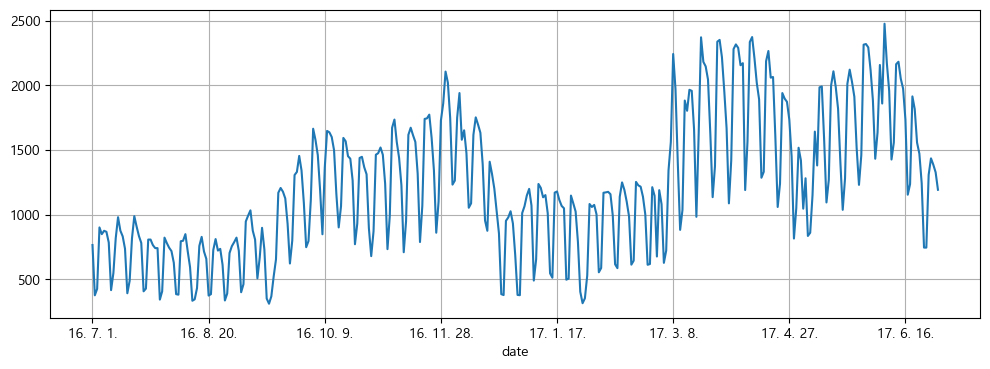

In [4]:
pweb['hit'].plot(figsize=(12,4), grid=True);

In [5]:
time = np.arange(0,len(pweb)) # 시간(time) 축 생성 (0~364)
traffic = pweb['hit'].values # 웹 트래픽 traffic 변수에 저장
fx = np.linspace(0, time[-1], 1000)
print(fx)

[  0.           0.36436436   0.72872873   1.09309309   1.45745746
   1.82182182   2.18618619   2.55055055   2.91491491   3.27927928
   3.64364364   4.00800801   4.37237237   4.73673674   5.1011011
   5.46546547   5.82982983   6.19419419   6.55855856   6.92292292
   7.28728729   7.65165165   8.01601602   8.38038038   8.74474474
   9.10910911   9.47347347   9.83783784  10.2022022   10.56656657
  10.93093093  11.2952953   11.65965966  12.02402402  12.38838839
  12.75275275  13.11711712  13.48148148  13.84584585  14.21021021
  14.57457457  14.93893894  15.3033033   15.66766767  16.03203203
  16.3963964   16.76076076  17.12512513  17.48948949  17.85385385
  18.21821822  18.58258258  18.94694695  19.31131131  19.67567568
  20.04004004  20.4044044   20.76876877  21.13313313  21.4974975
  21.86186186  22.22622623  22.59059059  22.95495495  23.31931932
  23.68368368  24.04804805  24.41241241  24.77677678  25.14114114
  25.50550551  25.86986987  26.23423423  26.5985986   26.96296296
  27.3273273

In [6]:
# 평균제곱오차(mean squared error, mse)
# 오차 = (예측값 - 실제값)**2
def error(f, x, y):
    return np.sqrt(np.mean((f(x)-y)**2))

In [7]:
# polyfit(x, y, n)
fp1 = np.polyfit(time, traffic, 1) #다항식의 입력값 x, y, 1차
f1 = np.poly1d(fp1)

f2p = np.polyfit(time, traffic, 2) #다항식의 입력값 x, y, 2차
f2 = np.poly1d(f2p)

f3p = np.polyfit(time, traffic, 3) #다항식의 입력값 x, y, 3차
f3 = np.poly1d(f3p)

f15p = np.polyfit(time, traffic, 15) #다항식의 입력값 x, y, 15차
f15 = np.poly1d(f15p)

print(error(f1, time, traffic))
print(error(f2, time, traffic))
print(error(f3, time, traffic))
print(error(f15, time, traffic))

430.85973081109626
430.6284101894695
429.53280466762925
330.4777304274343


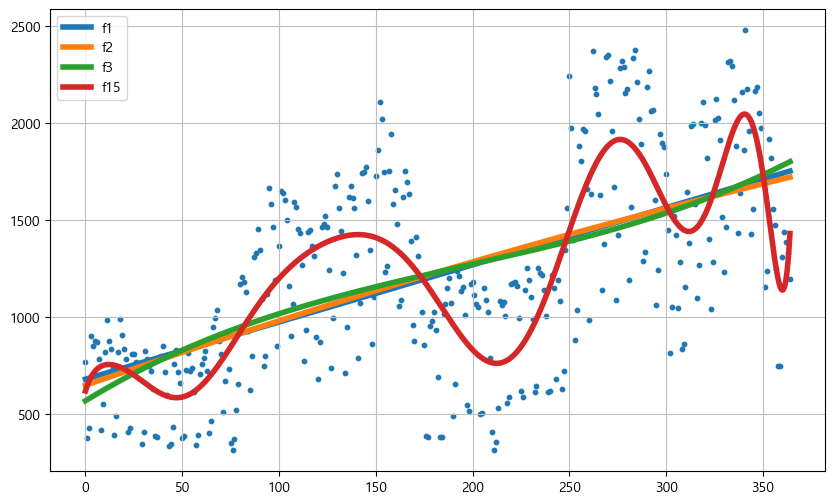

In [8]:
plt.figure(figsize=(10,6))
plt.scatter(time, traffic, s=10)

plt.plot(fx, f1(fx), lw=4, label='f1')
plt.plot(fx, f2(fx), lw=4, label='f2')
plt.plot(fx, f3(fx), lw=4, label='f3')
plt.plot(fx, f15(fx), lw=4, label='f15') # 과적합

plt.grid(True, linestyle='-', color='0.75')

plt.legend(loc=2)
plt.show()

## 2. Prophet 모듈을 이용한 forecast 예측

In [9]:
df = pd.DataFrame({'ds':pweb.index, 'y':pweb['hit']})
df.reset_index(inplace=True)
df['ds'] = pd.to_datetime(df['ds'], format="%y. %m. %d.") #yyyy-mm-dd 형태로
df.head()

,date,ds,y
0,16. 7. 1.,2016-07-01,766.0
1,16. 7. 2.,2016-07-02,377.0
2,16. 7. 3.,2016-07-03,427.0
3,16. 7. 4.,2016-07-04,902.0
4,16. 7. 5.,2016-07-05,850.0


In [10]:
del df['date'] # df['ds'] 변수를 생성했으므로 삭제
#Prophet() 함수를 사용시
#주기성이 연단위(yearly_seasonality) 및 일단위(daily_seasonality=True)로 있다고 알려줌
#Prophet 클래스 객체를 만들고 시계열 데이터를 입력으로 fit 메서드를 호출한다.
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df);

10:27:54 - cmdstanpy - INFO - Chain [1] start processing
10:27:54 - cmdstanpy - INFO - Chain [1] done processing


In [11]:
#make_future_dataframe:예측 날짜 구간 생성()
#16. 7. 1. ~ 17. 6. 30. 홈페이지 방문자 수
future = m.make_future_dataframe(periods=60)
print(future.head())
print(future.tail())

          ds
0 2016-07-01
1 2016-07-02
2 2016-07-03
3 2016-07-04
4 2016-07-05
            ds
420 2017-08-25
421 2017-08-26
422 2017-08-27
423 2017-08-28
424 2017-08-29


In [12]:
#predict: 신뢰 구간을 포함한 예측 실행
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
420,2017-08-25,901.398379,707.892918,1097.068908
421,2017-08-26,486.266408,270.736225,705.597092
422,2017-08-27,618.928059,423.123459,848.996408
423,2017-08-28,1171.734066,953.194587,1379.539929
424,2017-08-29,1207.743873,984.666391,1425.922816


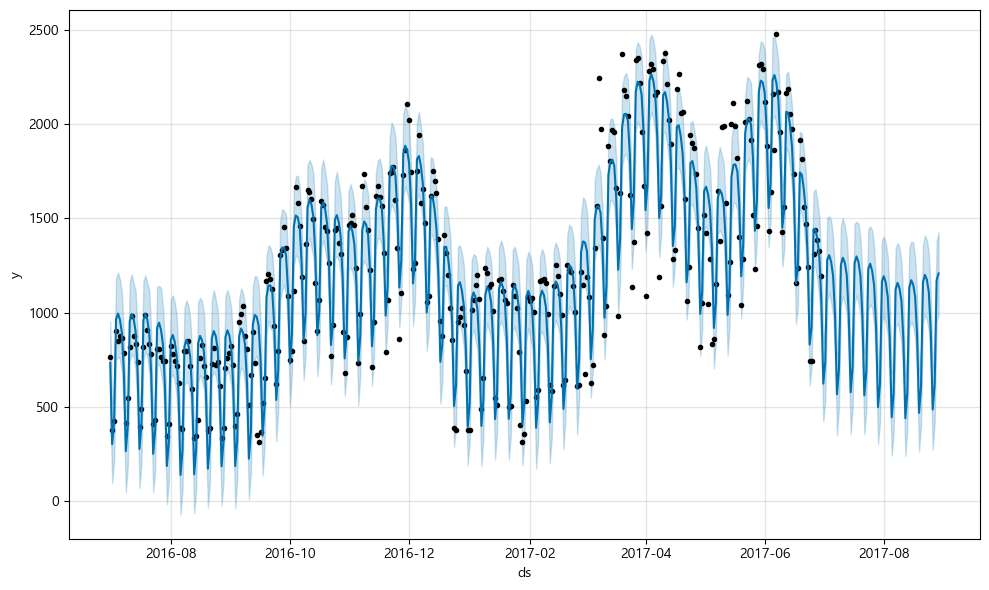

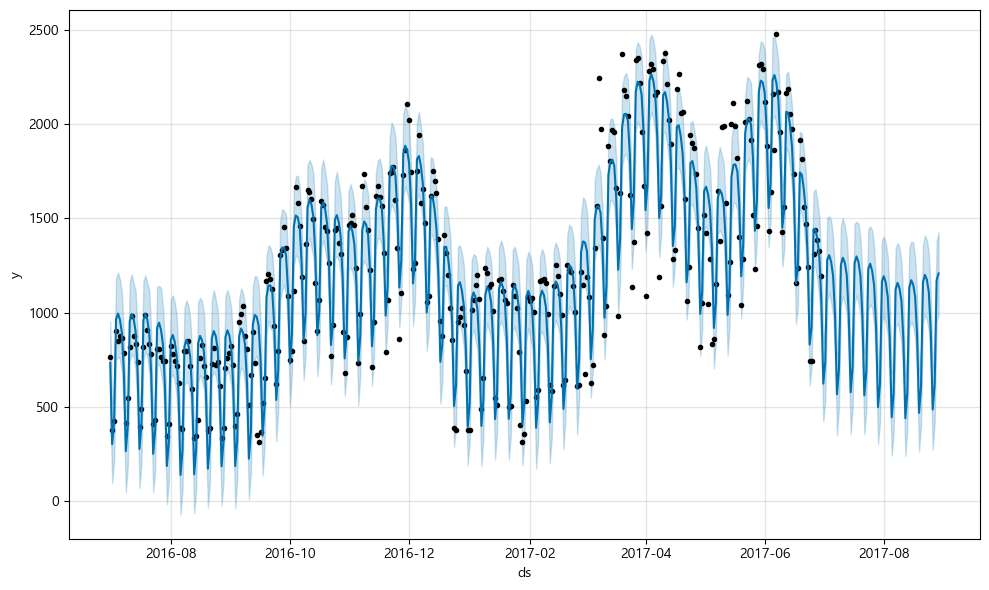

In [13]:
#ploot: 원래의 시계열 데이터와 예측 데이터
# 2017년 6월 말까지의 데이터로 약 2(60일)새월을 예측함
m.plot(forecast)

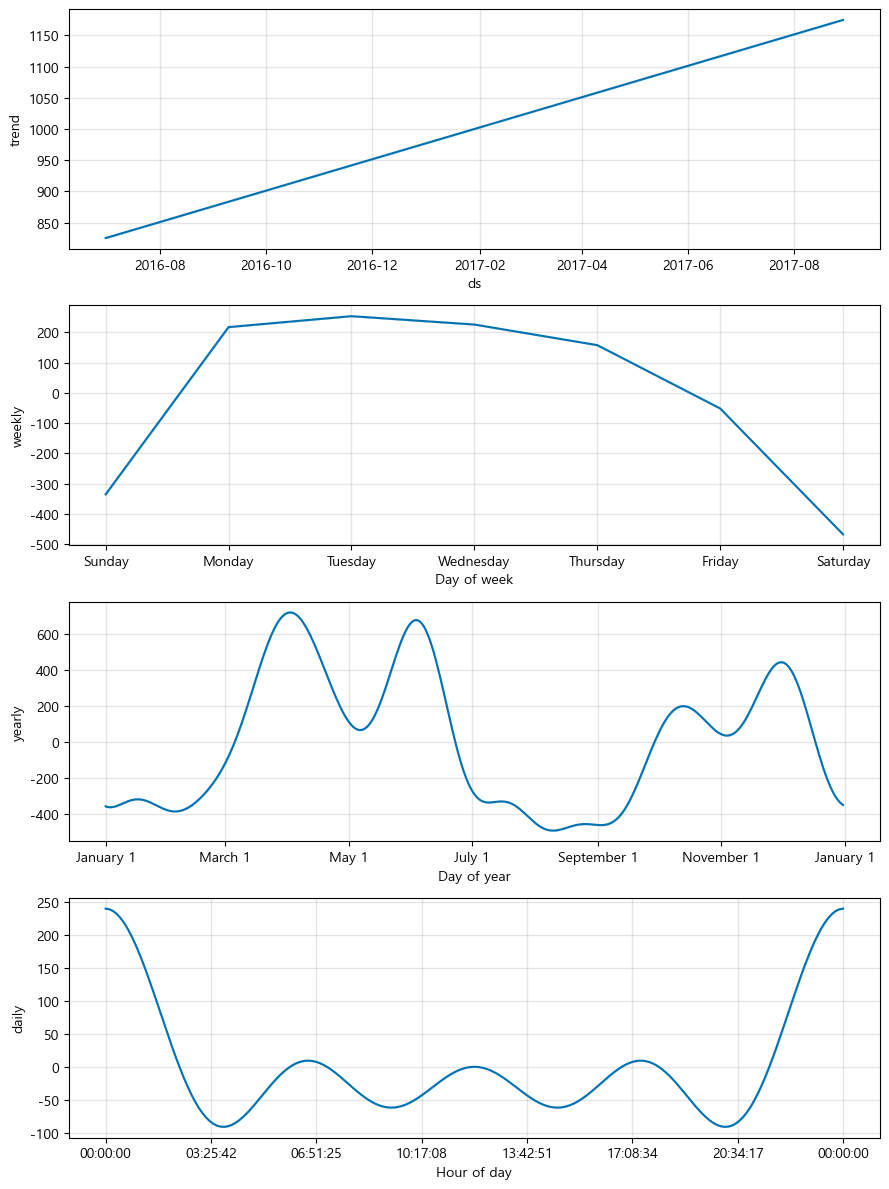

In [14]:
#plot_components: 선형회귀 및 계정설 성분별로 분리
m.plot_components(forecast);

## 3. Seasonal 시계열 분석으로 주식 데이터 분석하기

In [18]:
#https://finance.yahoo.com/
import datetime as dt
import yfinance as yf
company = 'TATAELXSI.NS'
# Define a start date and End Date
start = dt.datetime(2021,1,1)
end = dt.datetime(2023,5,1)
# Read Stock Price Data
data = yf.download(company, start, end)
data.tail(10)
# open 시가, high 고가, low 저가, close 종가, Adj close 조정 종가, volume 거래량

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-04-17,6237.950195,6300.0,6180.000000,6289.750000,6240.825195,108512
2023-04-18,6298.750000,6396.0,6295.000000,6367.299805,6317.771973,100611
2023-04-19,6368.000000,6375.0,6290.049805,6307.200195,6258.139648,69527
2023-04-20,6316.000000,6364.5,6235.350098,6251.649902,6203.021484,90809
2023-04-21,6269.000000,6300.0,6205.549805,6281.000000,6232.143555,66308
2023-04-24,6280.850098,6330.0,6220.049805,6252.950195,6204.312012,61632
2023-04-25,6253.000000,6307.0,6235.299805,6271.200195,6222.419922,47904
2023-04-26,6269.000000,6300.0,6240.000000,6290.850098,6241.916992,56123
2023-04-27,6284.000000,6635.0,6265.149902,6578.200195,6527.031738,493002


In [19]:
start = '2012-7-1'
end = '2022-7-31'
df = yf.download('000270.KS', start,end) #기아차
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-07-02,75600.0,75900.0,75000.0,75300.0,57019.425781,950363
2012-07-03,75800.0,75800.0,73100.0,73500.0,55656.406250,2542262
2012-07-04,74300.0,74500.0,73600.0,74500.0,56413.652344,1786898
2012-07-05,74600.0,74800.0,73800.0,74100.0,56110.750000,835637
2012-07-06,74400.0,74500.0,73500.0,73700.0,55807.855469,758448


In [23]:
start = '2012-1-1'
end = '2022-3-26'
KAO = yf.download('035720.KS', start,end) #카카오
KAO.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-02,24377.958984,25083.107422,24176.488281,24921.929688,24042.839844,473517
2012-01-03,24982.371094,25647.224609,24821.195312,25606.929688,24703.683594,520254
2012-01-04,25606.929688,25606.929688,25022.666016,25083.107422,24198.335938,464002
2012-01-05,25365.166016,25848.695312,25143.548828,25304.724609,24412.136719,377598
2012-01-06,25385.312500,25667.371094,24579.429688,24579.429688,23712.423828,228291


In [24]:
start = '2012-7-1'
end = '2022-6-30'
SAM = yf.download('005930.KS', start,end) #삼성
SAM.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-07-02,24160.0,24180.0,23420.0,23480.0,18562.662109,19106750
2012-07-03,23640.0,23860.0,23400.0,23500.0,18578.474609,15801550
2012-07-04,23640.0,23940.0,23560.0,23820.0,18831.464844,19158750
2012-07-05,23740.0,23880.0,23540.0,23700.0,18736.595703,9068550
2012-07-06,23880.0,23880.0,23060.0,23220.0,18357.117188,21158900


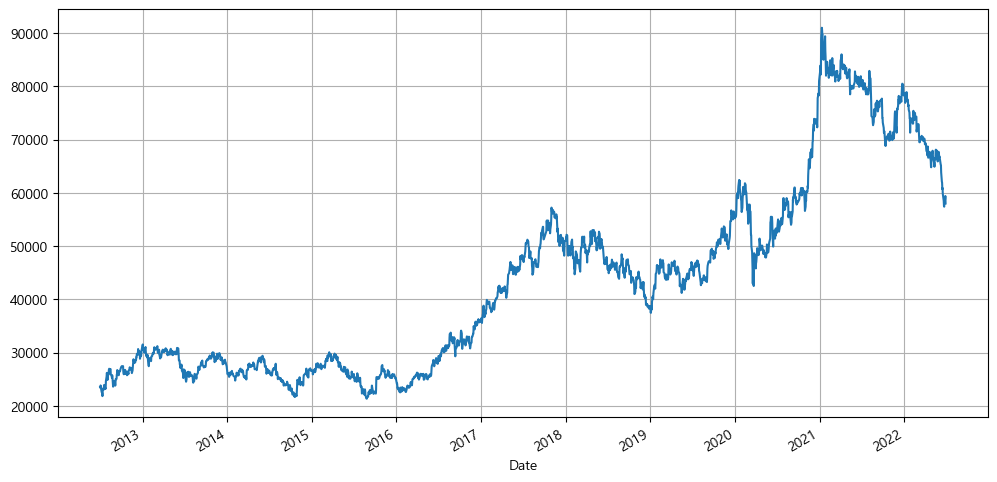

In [25]:
SAM['Close'].plot(figsize=(12,6), grid=True);

In [27]:
#start = '2012-7-1'
#end = '2022-6-30'
SAM_trunc = SAM[:'2022-12-31']#'2012-7-1' ~ '2022-12-31'
SAM_trunc

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-07-02,24160.0,24180.0,23420.0,23480.0,18562.662109,19106750
2012-07-03,23640.0,23860.0,23400.0,23500.0,18578.474609,15801550
2012-07-04,23640.0,23940.0,23560.0,23820.0,18831.464844,19158750
2012-07-05,23740.0,23880.0,23540.0,23700.0,18736.595703,9068550
2012-07-06,23880.0,23880.0,23060.0,23220.0,18357.117188,21158900
...,...,...,...,...,...,...
2022-06-23,57700.0,58000.0,56800.0,57400.0,55985.550781,28338608
2022-06-24,57900.0,59100.0,57700.0,58400.0,56960.914062,23256103
2022-06-27,59000.0,59900.0,58300.0,58800.0,57351.054688,18122236


In [28]:
df = pd.DataFrame({'ds':SAM_trunc.index, 'y':SAM_trunc['Close']})
df.reset_index(inplace=True)
del df['Date']
df.head()

,ds,y
0,2012-07-02,23480.0
1,2012-07-03,23500.0
2,2012-07-04,23820.0
3,2012-07-05,23700.0
4,2012-07-06,23220.0


In [29]:
#주기성이 일단위로 있다고 알려줌
m =Prophet(daily_seasonality=True)
m.fit(df)

11:19:09 - cmdstanpy - INFO - Chain [1] start processing
11:19:09 - cmdstanpy - INFO - Chain [1] done processing


In [31]:
#1년(365)일 후 예측
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
2817,2023-06-25
2818,2023-06-26
2819,2023-06-27
2820,2023-06-28
2821,2023-06-29


In [32]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2817,2023-06-25,83937.101702,75572.926862,91981.624772
2818,2023-06-26,84411.255939,75988.729189,93085.132147
2819,2023-06-27,84573.900556,76397.905943,93193.918895
2820,2023-06-28,84557.271226,76169.918518,92549.520570
2821,2023-06-29,84673.286724,76202.507818,92661.132255


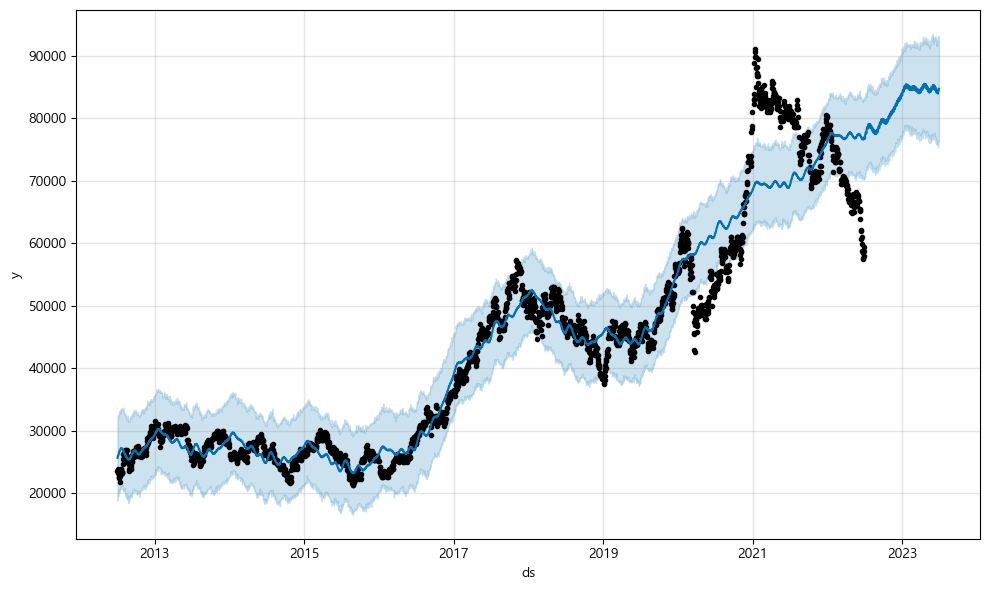

In [33]:
m.plot(forecast);

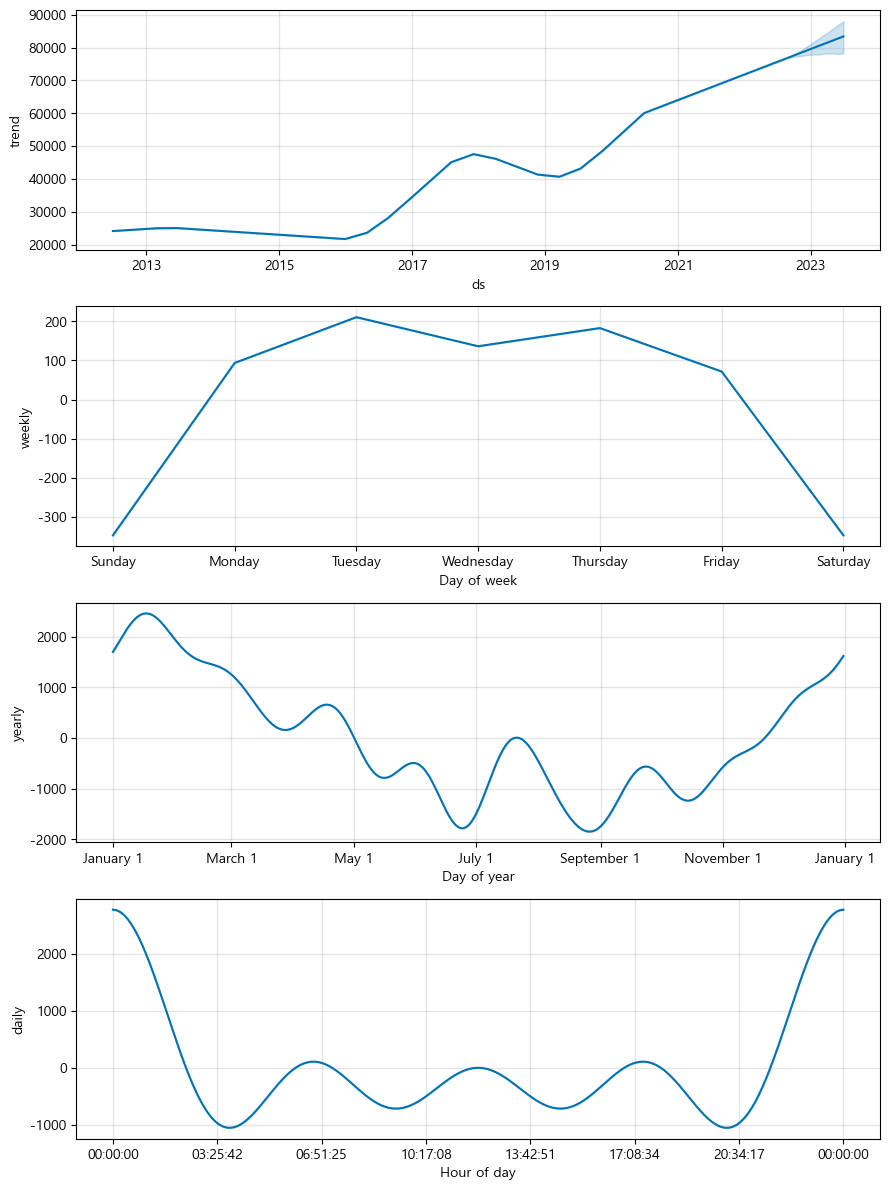

In [34]:
m.plot_components(forecast);

[*********************100%***********************]  1 of 1 completed


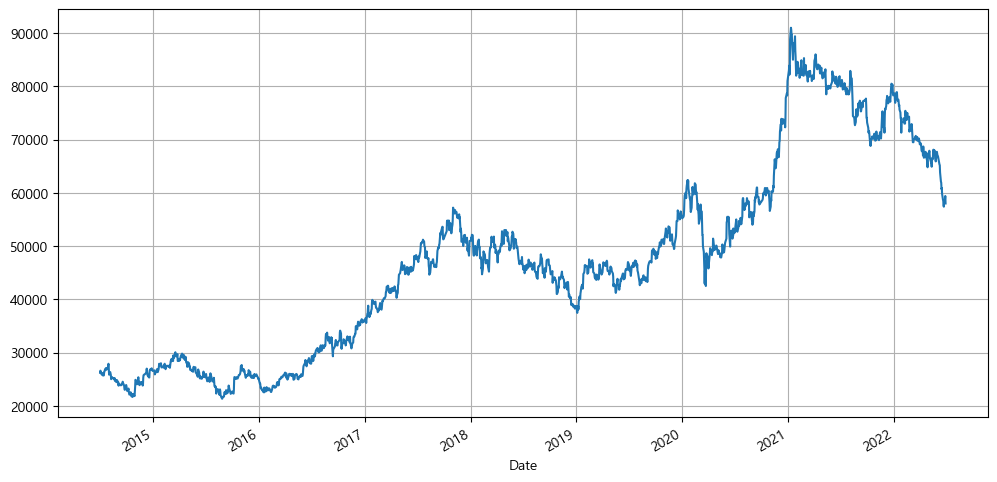

In [44]:
start_date = '2014-7-1'
end_date = '2022-6-30'
SAM = yf.download('005930.KS', start_date, end_date) #삼성
SAM['Close'].plot(figsize=(12,6), grid=True);

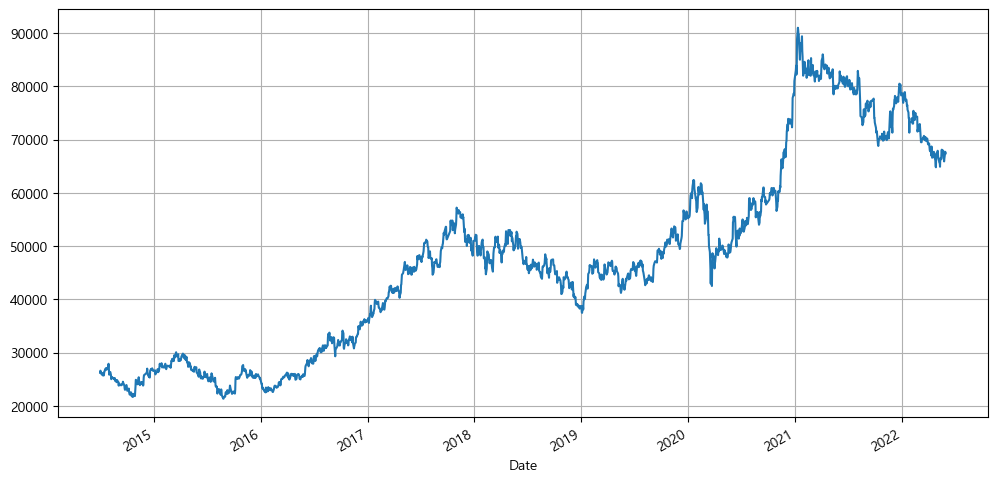

In [45]:
#일부데이터를 잘라서 forecast를 수행 ==> 2014-1-1' ~ '2017-7-31'
SAM_trunc = SAM[:'2022-05-31']
SAM_trunc['Close'].plot(figsize=(12,6), grid=True);

In [46]:
df = pd.DataFrame({'ds':SAM_trunc.index, 'y':SAM_trunc['Close']})
df.reset_index(inplace=True)
del df['Date']

In [47]:
m =Prophet(daily_seasonality=True)
m.fit(df)

11:38:15 - cmdstanpy - INFO - Chain [1] start processing
11:38:15 - cmdstanpy - INFO - Chain [1] done processing


In [48]:
future = m.make_future_dataframe(periods=61)
future.tail()

,ds
2001,2022-07-27
2002,2022-07-28
2003,2022-07-29
2004,2022-07-30
2005,2022-07-31


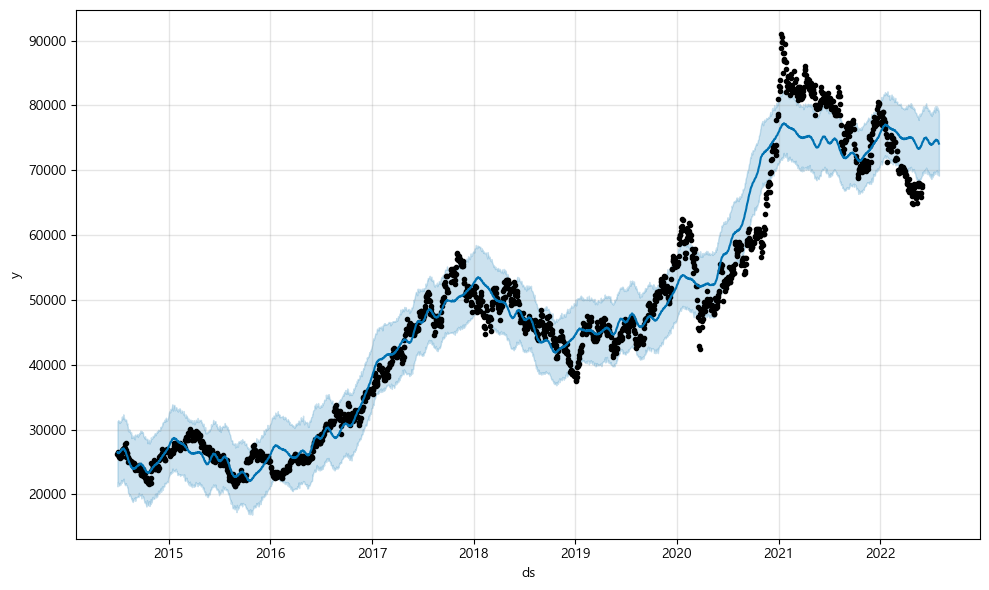

In [49]:
forecast = m.predict(future)
m.plot(forecast);

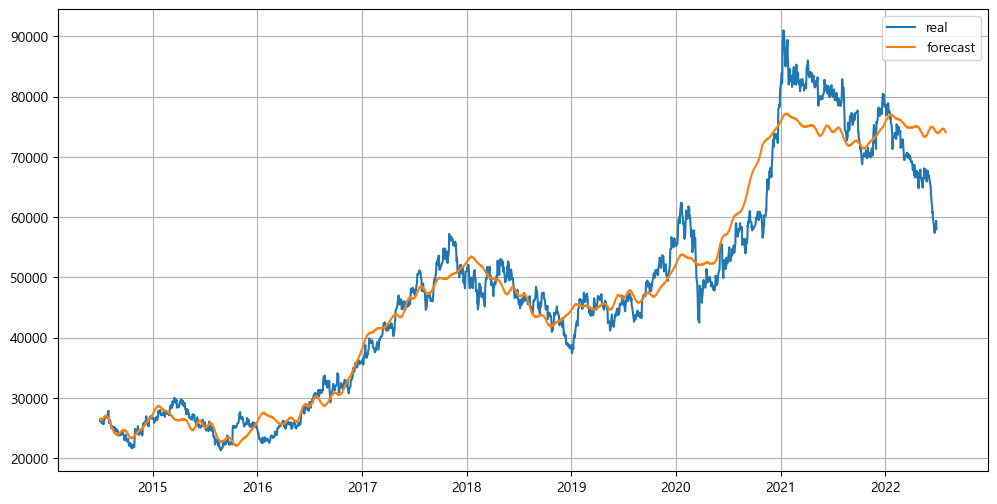

In [50]:
plt.figure(figsize=(12,6))
plt.plot(SAM.index, SAM['Close'], label='real')
plt.plot(forecast['ds'], forecast['yhat'], label='forecast')
plt.grid()
plt.legend()
plt.show()

## 4. Growth Model
* 주기성을 띠면서 점점 성장하는 모델

In [51]:
df = pd.read_csv('../data/08. example_wp_R.csv')
df['y'] = np.log(df['y']) #로그변환
df

,ds,y
0,2008-01-30,5.976351
1,2008-01-16,6.049733
2,2008-01-17,6.011267
3,2008-01-14,5.953243
4,2008-01-15,5.910797
...,...,...
2858,2015-12-11,7.834788
2859,2015-12-12,7.360104
2860,2015-12-13,7.479864
2861,2015-12-18,7.765145


In [52]:
# 예측 값의 최대 상한값과 하한값을 제어할 수 있다.
df['cap'] = 8.5 #최대 상한값
df['floor'] = 6 #하한값

In [53]:
#daily_seasonality=True : 주기성이 일단위라고 알려줌
#growth 파라미터를 설정 : 로지스틱 함수
m = Prophet(growth='logistic', daily_seasonality=True)
m.fit(df)

11:45:02 - cmdstanpy - INFO - Chain [1] start processing
11:45:02 - cmdstanpy - INFO - Chain [1] done processing


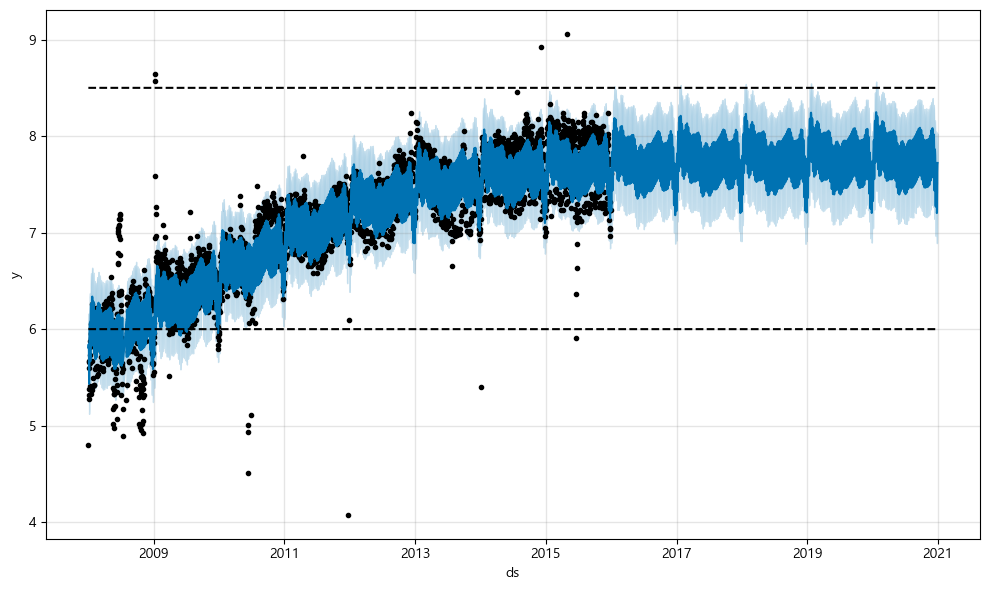

In [54]:
#Prophet은 Linear 한 모델을 사용 - 제어하지 않으면 해당 카테고리의 최대 사이즈를 넘을 수도 있다. 1826일(5년)
future = m.make_future_dataframe(periods=1826)
future['cap'] = 8.5 #상한값
future['floor'] = 6
fcst = m.predict(future)
m.plot(fcst);

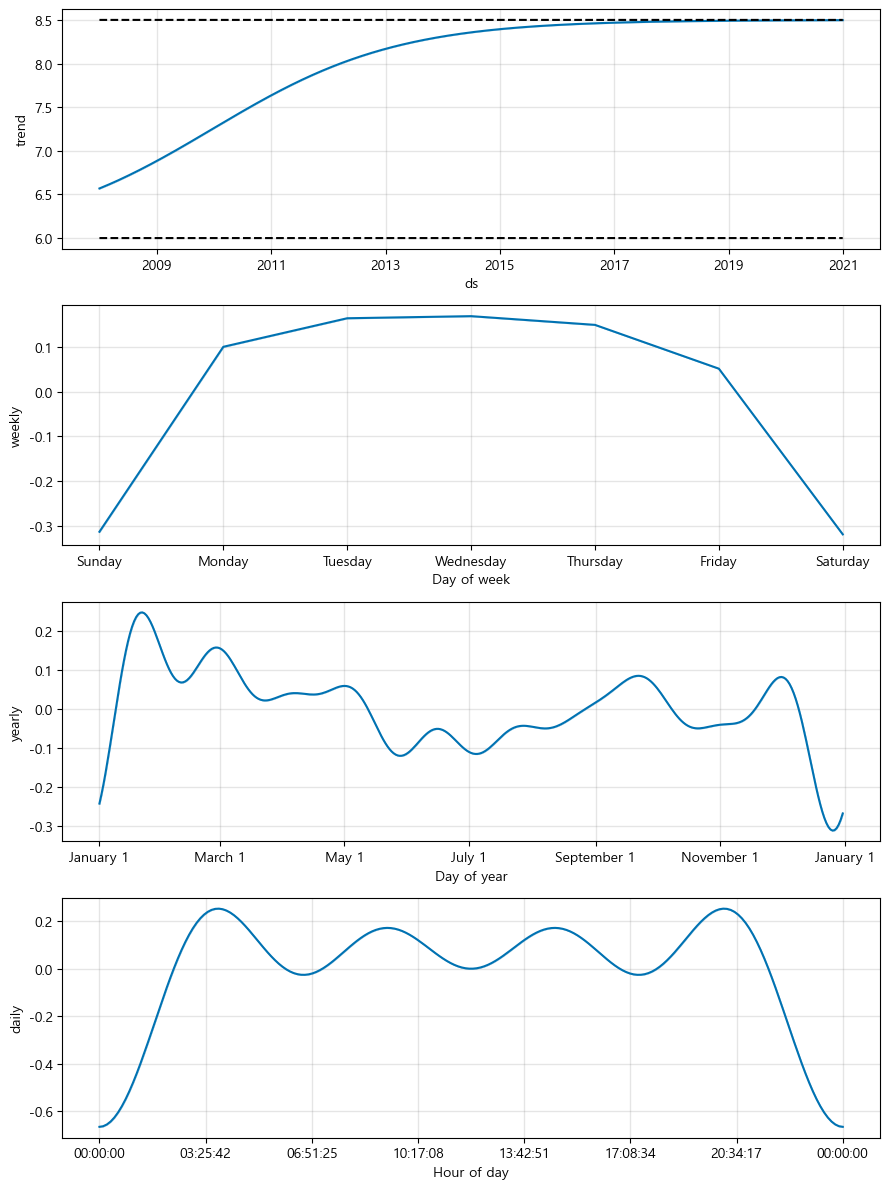

In [55]:
forecast = m.predict(future)
m.plot_components(forecast);

## 관심있는 주식을 분석

## 기간: 10년치

## 6개월 후 예측해 보세요

In [66]:
start = '2014-1-1'
end = '2023-7-1'
SKH = yf.download('000660.KS', start,end) #SK hynix
SKH.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-06-23,114000.0,115200.0,112500.0,113600.0,113600.0,2987472
2023-06-26,113100.0,113900.0,111200.0,113500.0,113500.0,3350758
2023-06-27,114000.0,114000.0,110800.0,113000.0,113000.0,3602087
2023-06-28,114200.0,115200.0,112800.0,114300.0,114300.0,3178571
2023-06-29,115200.0,117400.0,114500.0,116200.0,116200.0,4398301


In [67]:
SKH_trunc = SKH[:'2023-7-1']#'2014-1-1' ~ '2022-12-31'
SKH_trunc

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,37100.0,37350.0,35550.0,35550.0,31388.900391,4503101
2014-01-03,35700.0,36450.0,35600.0,36300.0,32051.109375,3866819
2014-01-06,36400.0,37700.0,36350.0,37650.0,33243.101562,5489696
2014-01-07,37350.0,37950.0,37200.0,37800.0,33375.539062,3365854
2014-01-08,38550.0,39100.0,38150.0,39000.0,34435.082031,6541929
...,...,...,...,...,...,...
2023-06-23,114000.0,115200.0,112500.0,113600.0,113600.000000,2987472
2023-06-26,113100.0,113900.0,111200.0,113500.0,113500.000000,3350758
2023-06-27,114000.0,114000.0,110800.0,113000.0,113000.000000,3602087


In [68]:
df1 = pd.DataFrame({'ds':SKH_trunc.index, 'y':SKH_trunc['Close']})
df1.reset_index(inplace=True)
del df1['Date']
df1.head()

,ds,y
0,2014-01-02,35550.0
1,2014-01-03,36300.0
2,2014-01-06,37650.0
3,2014-01-07,37800.0
4,2014-01-08,39000.0


In [69]:
m1 =Prophet(daily_seasonality=True)
m1.fit(df1)

12:13:59 - cmdstanpy - INFO - Chain [1] start processing
12:14:00 - cmdstanpy - INFO - Chain [1] done processing


In [70]:
future = m1.make_future_dataframe(periods=180)
future.tail()

,ds
2508,2023-12-22
2509,2023-12-23
2510,2023-12-24
2511,2023-12-25
2512,2023-12-26


In [71]:
forecast = m1.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2508,2023-12-22,72700.013670,61220.823406,83497.741471
2509,2023-12-23,72994.078877,61180.872921,83677.872782
2510,2023-12-24,73087.344124,61401.712345,83825.013806
2511,2023-12-25,72887.822347,61426.883581,83472.789038
2512,2023-12-26,73195.935217,61709.080348,84967.464127


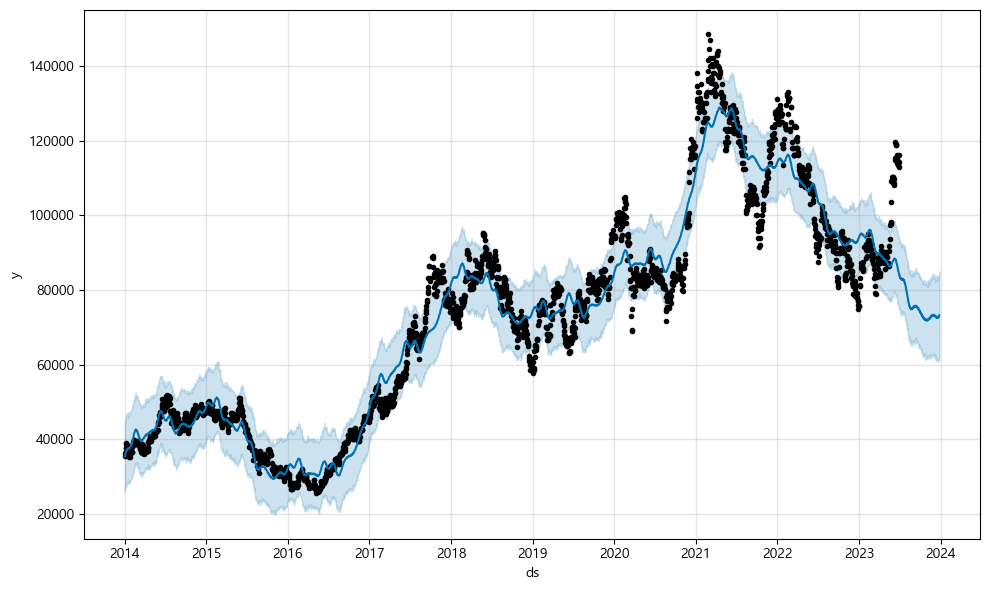

In [72]:
m1.plot(forecast);